In [2]:
a=5
a

5

In [5]:
import os
import librosa

In [6]:
zip_dir = 'DAIC_WOZ/train'
li=[]
for filename in os.listdir(zip_dir):
    li.append(filename)

In [8]:
len(li)

48

In [136]:
li

['301',
 '302',
 '303',
 '304',
 '305',
 '306',
 '307',
 '308',
 '309',
 '310',
 '311',
 '312',
 '324',
 '325',
 '326',
 '327',
 '328',
 '330',
 '331',
 '332',
 '333',
 '334',
 '335',
 '336',
 '337',
 '338',
 '339',
 '340',
 '315',
 '314',
 '316',
 '313',
 '317',
 '341',
 '346',
 '349',
 '343',
 '350',
 '344',
 '345',
 '329',
 '360',
 '320',
 '356',
 '323',
 '319',
 '355',
 '318']

In [13]:
import zipfile
import os

# Path to the directory containing the ZIP files (e.g., DAIC_WOZ/train/)
zip_dir = 'DAIC_WOZ/train'
extracted_dir = 'DAIC_WOZ/train_extract'

# Iterate over all ZIP files in the directory
for filename in os.listdir(zip_dir):
    if filename.endswith(".zip"):
        # Construct full path to the ZIP file
        zip_file_path = os.path.join(zip_dir, filename)
        
        # Extract the ZIP file
        try:
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                # Extract all contents into aa/ specified directory
                
                    zip_ref.extractall(extracted_dir)
                    print(f'Extracted: {filename}')
        except:
            continue


Extracted: 301_P.zip
Extracted: 302_P.zip
Extracted: 303_P.zip
Extracted: 304_P.zip
Extracted: 305_P.zip
Extracted: 306_P.zip
Extracted: 307_P.zip
Extracted: 308_P.zip
Extracted: 309_P.zip
Extracted: 310_P.zip
Extracted: 311_P.zip
Extracted: 312_P.zip
Extracted: 324_P.zip
Extracted: 325_P.zip
Extracted: 326_P.zip
Extracted: 327_P.zip
Extracted: 328_P.zip
Extracted: 330_P.zip
Extracted: 331_P.zip
Extracted: 332_P.zip
Extracted: 333_P.zip
Extracted: 334_P.zip
Extracted: 335_P.zip
Extracted: 336_P.zip
Extracted: 337_P.zip
Extracted: 338_P.zip
Extracted: 339_P.zip
Extracted: 340_P.zip
Extracted: 315_P.zip
Extracted: 314_P.zip
Extracted: 316_P.zip
Extracted: 313_P.zip
Extracted: 317_P.zip
Extracted: 341_P.zip
Extracted: 346_P.zip
Extracted: 343_P.zip
Extracted: 350_P.zip
Extracted: 344_P.zip
Extracted: 345_P.zip
Extracted: 360_P.zip
Extracted: 320_P.zip
Extracted: 356_P.zip
Extracted: 323_P.zip
Extracted: 319_P.zip
Extracted: 355_P.zip
Extracted: 318_P.zip


In [14]:
import os
import librosa

# Directory containing the extracted participant folders
data_dir = "DAIC_WOZ/train_extract"
participant_dirs = os.listdir(data_dir)
print(participant_dirs)
# Iterate through participants and load audio data
for participant in participant_dirs:
    participant_path = os.path.join(data_dir, participant)
    
    # Construct the correct path for the audio file inside the participant's directory
    # audio_file_path = os.path.join(participant_path, f"{participant}_AUDIO.wav")
    # print(audio_file_path)
    # Check if the audio file exists
    if participant_path[-3:]!="wav":
        continue
    if os.path.exists(participant_path):
        #print(f"Processing {audio_file_path}")
        
        # Load the audio file, resample to 16kHz for Wav2Vec 2.0
        audio_data, sr = librosa.load(participant_path, sr=16000)
        
        # Process audio_data for further tasks (e.g., feature extraction or model input)
    else:
        print(f"Audio file not found for {participant}")


['301_AUDIO.wav', '301_CLNF_AUs.txt', '301_CLNF_features.txt', '301_CLNF_features3D.txt', '301_CLNF_gaze.txt', '301_CLNF_hog.bin', '301_CLNF_pose.txt', '301_COVAREP.csv', '301_FORMANT.csv', '301_TRANSCRIPT.csv', '302_AUDIO.wav', '302_CLNF_AUs.txt', '302_CLNF_features.txt', '302_CLNF_features3D.txt', '302_CLNF_gaze.txt', '302_CLNF_hog.bin', '302_CLNF_pose.txt', '302_COVAREP.csv', '302_FORMANT.csv', '302_TRANSCRIPT.csv', '303_AUDIO.wav', '303_CLNF_AUs.txt', '303_CLNF_features.txt', '303_CLNF_features3D.txt', '303_CLNF_gaze.txt', '303_CLNF_hog.bin', '303_CLNF_pose.txt', '303_COVAREP.csv', '303_FORMANT.csv', '303_TRANSCRIPT.csv', '304_AUDIO.wav', '304_CLNF_AUs.txt', '304_CLNF_features.txt', '304_CLNF_features3D.txt', '304_CLNF_gaze.txt', '304_CLNF_hog.bin', '304_CLNF_pose.txt', '304_COVAREP.csv', '304_FORMANT.csv', '304_TRANSCRIPT.csv', '305_AUDIO.wav', '305_CLNF_AUs.txt', '305_CLNF_features.txt', '305_CLNF_features3D.txt', '305_CLNF_gaze.txt', '305_CLNF_hog.bin', '305_CLNF_pose.txt', '305

In [22]:
len(audio_data)

12878400

In [47]:
import pandas as pd

In [48]:
# Load the data for all participants and store them in a list for model training
all_audio_data = []
all_transcripts = []
all_labels = []

for participant in participant_dirs:
    # Load audio
    participant_path = os.path.join(data_dir, participant)
    print(participant_path)
    if participant_path[-3:]=="wav":
    
        audio_data, sr = librosa.load(participant_path, sr=16000)
        all_audio_data.append(audio_data)
    elif "TRANSCRIPT.csv" == participant_path[-14:]:
        # print(1)
    # Load transcript
        
        transcript = pd.read_csv(participant_path)
        all_transcripts.append(transcript)
    # elif participant_path[-7:]=="_PHQ8.csv":
    # # Load PHQ-8 depression label
    #     print(2)
    #     phq8_label = pd.read_csv(participant_path)['PHQ8'].values[0]
    #     all_labels.append(phq8_label)
    
    # Append to data lists



DAIC_WOZ/train_extract/301_AUDIO.wav
DAIC_WOZ/train_extract/301_CLNF_AUs.txt
DAIC_WOZ/train_extract/301_CLNF_features.txt
DAIC_WOZ/train_extract/301_CLNF_features3D.txt
DAIC_WOZ/train_extract/301_CLNF_gaze.txt
DAIC_WOZ/train_extract/301_CLNF_hog.bin
DAIC_WOZ/train_extract/301_CLNF_pose.txt
DAIC_WOZ/train_extract/301_COVAREP.csv
DAIC_WOZ/train_extract/301_FORMANT.csv
DAIC_WOZ/train_extract/301_TRANSCRIPT.csv
DAIC_WOZ/train_extract/302_AUDIO.wav
DAIC_WOZ/train_extract/302_CLNF_AUs.txt
DAIC_WOZ/train_extract/302_CLNF_features.txt
DAIC_WOZ/train_extract/302_CLNF_features3D.txt
DAIC_WOZ/train_extract/302_CLNF_gaze.txt
DAIC_WOZ/train_extract/302_CLNF_hog.bin
DAIC_WOZ/train_extract/302_CLNF_pose.txt
DAIC_WOZ/train_extract/302_COVAREP.csv
DAIC_WOZ/train_extract/302_FORMANT.csv
DAIC_WOZ/train_extract/302_TRANSCRIPT.csv
DAIC_WOZ/train_extract/303_AUDIO.wav
DAIC_WOZ/train_extract/303_CLNF_AUs.txt
DAIC_WOZ/train_extract/303_CLNF_features.txt
DAIC_WOZ/train_extract/303_CLNF_features3D.txt
DAIC_WOZ/

In [50]:
all_transcripts[0]

,start_time\tstop_time\tspeaker\tvalue
0,29.428\t35.888\tEllie\thi i'm ellie thanks for...
1,32.738\t33.068\tParticipant\tthank you
2,36.598\t40.948\tEllie\tthink of me as a friend...
3,42.088\t42.518\tParticipant\tmmm k
4,42.358\t51.738\tEllie\ti'm here to learn about...
...,...
176,799.208\t800.658\tEllie\tthanks for sharing yo...
177,800.678\t801.278\tParticipant\tno problem
178,801.828\t802.358\tEllie\tgoodbye
179,802.388\t802.828\tParticipant\talright


In [27]:
all_audio_data

[array([-0.00292969, -0.00350952, -0.00408936, ..., -0.00231934,
        -0.0017395 , -0.00134277], dtype=float32),
 array([-0.00033569,  0.        , -0.00018311, ..., -0.00286865,
        -0.00274658, -0.00292969], dtype=float32),
 array([-0.00308228, -0.00299072, -0.00292969, ...,  0.00186157,
         0.0017395 ,  0.00201416], dtype=float32),
 array([ 0.00473022,  0.00469971,  0.00442505, ...,  0.00012207,
        -0.00024414, -0.00012207], dtype=float32),
 array([-0.00534058, -0.00680542, -0.0093689 , ...,  0.01843262,
         0.01538086,  0.01589966], dtype=float32),
 array([-0.00183105, -0.00234985, -0.00170898, ...,  0.0010376 ,
        -0.00140381, -0.00375366], dtype=float32),
 array([ 0.01977539,  0.02487183,  0.02529907, ..., -0.05596924,
        -0.03308105, -0.01171875], dtype=float32),
 array([-0.00549316, -0.0062561 , -0.00546265, ..., -0.00650024,
        -0.00762939, -0.00817871], dtype=float32),
 array([ 1.2207031e-04,  9.1552734e-05,  1.5258789e-04, ...,
        -1.

In [28]:
all_normalized_audio_data = [librosa.util.normalize(audio) for audio in all_audio_data]

In [31]:
from transformers import Wav2Vec2Processor

# Load the Wav2Vec 2.0 processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")

# Tokenize each audio file
all_inputs = [processor(audio, sampling_rate=16000, return_tensors="pt").input_values for audio in all_audio_data]


/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.11/site-packages/transformers/configuration_utils.py:302: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [83]:
all_inputs[0].shape, all_inputs[1].shape,all_inputs[2].shape,  

(torch.Size([1, 13182400]),
 torch.Size([1, 12140800]),
 torch.Size([1, 15764800]))

In [84]:
def downsample_audio(data, downsample_factor):
    """
    Downsamples the audio by selecting every n-th frame.
    data: Tensor of shape [1, num_frames]
    downsample_factor: The factor by which to reduce the number of frames
    Returns a downsampled tensor
    """
    return data[:, ::downsample_factor]

# Example usage
downsample_factor = 10  # Keep every 10th frame
all_inputs_downsampled = [downsample_audio(data, downsample_factor) for data in all_inputs]


In [88]:
all_inputs_downsampled[0].shape, all_inputs[0].shape

(torch.Size([1, 1318240]), torch.Size([1, 13182400]))

In [89]:
def segment_audio(data, segment_length):
    """
    Segments audio into fixed-length chunks.
    data: Tensor of shape [1, num_frames]
    segment_length: The number of frames per segment
    Returns a list of smaller chunks
    """
    num_frames = data.size(1)
    segments = []
    for i in range(0, num_frames, segment_length):
        segment = data[:, i:i+segment_length]
        segments.append(segment)
    return segments

# Example usage
segment_length = 100000  # Fixed length per segment
all_segments = [segment_audio(data, segment_length) for data in all_inputs]


In [95]:
len(all_segments[0]), len(all_segments[1]), len

(132, 122)

In [33]:
binary_labels = [1 if label >= 10 else 0 for label in all_labels]

In [38]:
binary_labels

[]

In [39]:
all_labels

[]

In [62]:
li = [x.split('_')[0] for x in li]
li

['301_P.zip',
 '302_P.zip',
 '303_P.zip',
 '304_P.zip',
 '305_P.zip',
 '306_P.zip',
 '307_P.zip',
 '308_P.zip',
 '309_P.zip',
 '310_P.zip',
 '311_P.zip',
 '312_P.zip',
 '324_P.zip',
 '325_P.zip',
 '326_P.zip',
 '327_P.zip',
 '328_P.zip',
 '330_P.zip',
 '331_P.zip',
 '332_P.zip',
 '333_P.zip',
 '334_P.zip',
 '335_P.zip',
 '336_P.zip',
 '337_P.zip',
 '338_P.zip',
 '339_P.zip',
 '340_P.zip',
 '315_P.zip',
 '314_P.zip',
 '316_P.zip',
 '313_P.zip',
 '317_P.zip',
 '341_P.zip',
 '346_P.zip',
 '349_P.zip',
 '343_P.zip',
 '350_P.zip',
 '344_P.zip',
 '345_P.zip']

In [94]:
import pandas as pd
import os

# Paths to the CSV files
dev_csv = 'DAIC_WOZ/train_extract/dev_split_Depression_AVEC2017(1).csv'
train_csv = 'DAIC_WOZ/train_extract/train_split_Depression_AVEC2017(1).csv'
test_csv = 'DAIC_WOZ/train_extract/test_split_Depression_AVEC2017.csv'

# Path to the train folder containing participant directories
train_folder = 'DAIC_WOZ/train'

# Step 1: Load the CSV files into DataFrames
dev_df = pd.read_csv(dev_csv)
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Step 2: Combine all three DataFrames
combined_df = pd.concat([dev_df, train_df, test_df], ignore_index=True)
combined_df['Participant_ID'] = combined_df['Participant_ID'].fillna(0)

# Now convert 'Participant_ID' to integer


# Apply a lambda function to check if 'Participant_ID' is 0 and perform some action
# Replace 0s in 'Participant_ID' with corresponding values from 'participant_ID'
combined_df['Participant_ID'] = combined_df.apply(
    lambda row: row['participant_ID'] if row['Participant_ID'] == 0 else row['Participant_ID'], axis=1
)

combined_df['Participant_ID'] = combined_df['Participant_ID'].apply(lambda x: int(x))

# Step 4: Filter the combined DataFrame based on Participant_ID in participant_ids
filtered_df = combined_df[combined_df['Participant_ID'].astype(str).isin(li)]

# Step 5: Save the filtered DataFrame to a new CSV file (if needed)
filtered_df.to_csv('filtered_participants.csv', index=False)

# Display the filtered DataFrame
print(filtered_df.head())  # Show the first few rows


   Participant_ID  PHQ8_Binary  PHQ8_Score  Gender  PHQ8_NoInterest  \
0             302          0.0         4.0       1              1.0   
1             307          0.0         4.0       0              0.0   
2             331          0.0         8.0       1              1.0   
3             335          1.0        12.0       0              1.0   
4             346          1.0        23.0       0              2.0   

   PHQ8_Depressed  PHQ8_Sleep  PHQ8_Tired  PHQ8_Appetite  PHQ8_Failure  \
0             1.0         0.0         1.0            0.0           1.0   
1             1.0         0.0         1.0            0.0           2.0   
2             1.0         1.0         1.0            1.0           1.0   
3             1.0         3.0         2.0            3.0           1.0   
4             3.0         3.0         3.0            3.0           3.0   

   PHQ8_Concentrating  PHQ8_Moving  participant_ID  
0                 0.0          0.0             NaN  
1                 0.0 

In [96]:
combined_df[combined_df['Participant_ID']=='340']

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving,participant_ID


In [102]:
len(filtered_df)

40

In [73]:
participant_ids['Participant_ID']=participant_ids['Participant_ID'].lambda x=int(x)

['301',
 '302',
 '303',
 '304',
 '305',
 '306',
 '307',
 '308',
 '309',
 '310',
 '311',
 '312',
 '324',
 '325',
 '326',
 '327',
 '328',
 '330',
 '331',
 '332',
 '333',
 '334',
 '335',
 '336',
 '337',
 '338',
 '339',
 '340',
 '315',
 '314',
 '316',
 '313',
 '317',
 '341',
 '346',
 '349',
 '343',
 '350',
 '344',
 '345']

In [79]:
# Fill NaN values in 'Participant_ID' with 0 (or any other default value)
combined_df['Participant_ID'] = combined_df['Participant_ID'].fillna(0)

# Now convert 'Participant_ID' to integer
combined_df['Participant_ID'] = combined_df['Participant_ID'].apply(lambda x: int(x))


In [107]:
combined_df['Participant_ID'].tolist()


[302,
 307,
 331,
 335,
 346,
 367,
 377,
 381,
 382,
 388,
 389,
 390,
 395,
 403,
 404,
 406,
 413,
 417,
 418,
 420,
 422,
 436,
 439,
 440,
 451,
 458,
 472,
 476,
 477,
 482,
 483,
 484,
 489,
 490,
 492,
 303,
 304,
 305,
 310,
 312,
 313,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 324,
 325,
 326,
 327,
 328,
 330,
 333,
 336,
 338,
 339,
 340,
 341,
 343,
 344,
 345,
 347,
 348,
 350,
 351,
 352,
 353,
 355,
 356,
 357,
 358,
 360,
 362,
 363,
 364,
 366,
 368,
 369,
 370,
 371,
 372,
 374,
 375,
 376,
 379,
 380,
 383,
 385,
 386,
 391,
 392,
 393,
 397,
 400,
 401,
 402,
 409,
 412,
 414,
 415,
 416,
 419,
 423,
 425,
 426,
 427,
 428,
 429,
 430,
 433,
 434,
 437,
 441,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 454,
 455,
 456,
 457,
 459,
 463,
 464,
 468,
 471,
 473,
 474,
 475,
 478,
 479,
 485,
 486,
 487,
 488,
 491,
 300,
 301,
 306,
 308,
 309,
 311,
 314,
 323,
 329,
 332,
 334,
 337,
 349,
 354,
 359,
 361,
 365,
 373,
 378,
 384,
 387,
 396,
 399,
 405,
 407

In [103]:
combined_df.iloc[188]

Participant_ID        481.0
PHQ8_Binary             NaN
PHQ8_Score              NaN
Gender                  1.0
PHQ8_NoInterest         NaN
PHQ8_Depressed          NaN
PHQ8_Sleep              NaN
PHQ8_Tired              NaN
PHQ8_Appetite           NaN
PHQ8_Failure            NaN
PHQ8_Concentrating      NaN
PHQ8_Moving             NaN
participant_ID        481.0
Name: 188, dtype: float64

In [57]:
filtered_df

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving,participant_ID


In [63]:
li = [x.split('_')[0] for x in li]


In [64]:
li

['301',
 '302',
 '303',
 '304',
 '305',
 '306',
 '307',
 '308',
 '309',
 '310',
 '311',
 '312',
 '324',
 '325',
 '326',
 '327',
 '328',
 '330',
 '331',
 '332',
 '333',
 '334',
 '335',
 '336',
 '337',
 '338',
 '339',
 '340',
 '315',
 '314',
 '316',
 '313',
 '317',
 '341',
 '346',
 '349',
 '343',
 '350',
 '344',
 '345']

In [109]:
filtered_df.columns

Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender',
       'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
       'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving',
       'participant_ID'],
      dtype='object')

In [112]:
filtered_df['PHQ8_Depressed'].isna().sum()

10

In [114]:
filtered_df['PHQ8_Score'].isna().sum()

10

In [98]:
import torch.nn.functional as F

def segment_audio(data, segment_length):
    """
    Segments audio into fixed-length chunks, padding the last segment if necessary.
    data: Tensor of shape [1, num_frames]
    segment_length: The number of frames per segment.
    Returns a list of smaller chunks.
    """
    num_frames = data.size(1)
    segments = []
    for i in range(0, num_frames, segment_length):
        segment = data[:, i:i + segment_length]
        
        # Pad the last segment if it's shorter than segment_length
        if segment.size(1) < segment_length:
            padding_size = segment_length - segment.size(1)
            segment = F.pad(segment, (0, padding_size))
        
        segments.append(segment)
    return segments

# Example usage
segment_length = 100000  # Fixed length per segment
segmented_inputs = [segment_audio(data, segment_length) for data in all_inputs]


# Example usage
segment_length = 100000  # Fixed length per segment
segmented_inputs = [segment_audio(data, segment_length) for data in all_inputs]

flat_inputs = []
flat_labels = []

for i, segments in enumerate(segmented_inputs):
    flat_inputs.extend(segments)  # Add each segment to the flat list
    flat_labels.extend([binary_labels[i]] * len(segments))  # Replicate the label for each segment

# Ensure both inputs and labels are tensors
flat_inputs_tensor = torch.cat(flat_inputs)  # Concatenate the segments into a tensor
flat_labels_tensor = torch.tensor(flat_labels)  # Labels as tensor


In [ ]:
PHQ8_Concentrating

In [103]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class CNNWithAttentionPooling(nn.Module):
#     def __init__(self, num_channels, num_filters, kernel_size, dropout_rate):
#         super(CNNWithAttentionPooling, self).__init__()
        
#         # Define 1D-CNN layer
#         self.cnn_layer = nn.Conv1d(in_channels=num_channels, out_channels=num_filters, kernel_size=kernel_size)
        
#         # Dropout for regularization
#         self.dropout = nn.Dropout(dropout_rate)
        
#         # Attention scoring linear layer
#         self.attention_linear = nn.Linear(num_filters, 1)
        
#     def forward(self, frame_level_features):
#         """
#         frame_level_features: Tensor of shape [batch_size, num_frames, feature_dim]
#         """
#         # Transpose to match Conv1d input format: [batch_size, feature_dim, num_frames]
#         x = frame_level_features.transpose(1, 2)  # Now x is [batch_size, feature_dim, num_frames]

#         # Pass through 1D-CNN layer
#         cnn_output = self.cnn_layer(x)  # [batch_size, num_filters, num_frames]
        
#         # Apply ReLU activation
#         cnn_output = F.relu(cnn_output)

#         # Apply dropout for regularization
#         cnn_output = self.dropout(cnn_output)

#         # Transpose back to [batch_size, num_frames, num_filters] for attention computation
#         cnn_output = cnn_output.transpose(1, 2)

#         # Attention Pooling
#         # Step 1: Compute attention scores
#         attention_scores = self.attention_linear(cnn_output)  # [batch_size, num_frames, 1]

#         # Apply softmax to get attention weights
#         attention_weights = F.softmax(attention_scores, dim=1)  # [batch_size, num_frames, 1]

#         # Step 2: Weighted sum of CNN output based on attention weights
#         weighted_sum = cnn_output * attention_weights  # Element-wise multiplication
        
#         # Sum across the frames to get the pooled feature representation
#         pooled_features = weighted_sum.sum(dim=1)  # [batch_size, num_filters]

#         return pooled_features
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNWithAttentionPooling(nn.Module):
    def __init__(self, num_channels, num_filters, kernel_size, dropout_rate):
        super(CNNWithAttentionPooling, self).__init__()
        
        # Define 1D-CNN layer
        self.cnn_layer = nn.Conv1d(in_channels=num_channels, out_channels=num_filters, kernel_size=kernel_size)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
        
        # Attention scoring linear layer
        self.attention_linear = nn.Linear(num_filters, 1)
        
    def forward(self, frame_level_features):
        """
        frame_level_features: Tensor of shape [batch_size, num_frames, feature_dim]
        """
        # Transpose to match Conv1d input format: [batch_size, feature_dim, num_frames]
        if len(frame_level_features.shape) == 2:
            frame_level_features = frame_level_features.unsqueeze(2)
        x = frame_level_features.transpose(1, 2)  # Now x is [batch_size, feature_dim, num_frames]

        # Pass through 1D-CNN layer
        cnn_output = self.cnn_layer(x)  # [batch_size, num_filters, num_frames]
        
        # Apply ReLU activation
        cnn_output = F.relu(cnn_output)

        # Apply dropout for regularization
        cnn_output = self.dropout(cnn_output)

        # Transpose back to [batch_size, num_frames, num_filters] for attention computation
        cnn_output = cnn_output.transpose(1, 2)

        # Attention Pooling
        # Step 1: Compute attention scores
        attention_scores = self.attention_linear(cnn_output)  # [batch_size, num_frames, 1]

        # Apply softmax to get attention weights
        attention_weights = F.softmax(attention_scores, dim=1)  # [batch_size, num_frames, 1]

        # Step 2: Weighted sum of CNN output based on attention weights
        weighted_sum = cnn_output * attention_weights  # Element-wise multiplication
        
        # Sum across the frames to get the pooled feature representation
        pooled_features = weighted_sum.sum(dim=1)  # [batch_size, num_filters]

        return pooled_features


In [104]:
# class LSTMWithSelfAttention(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, dropout_rate):
#         super(LSTMWithAttention, self).__init__()
#         self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout_rate, bidirectional=True)
#         self.attention_linear=nn.Linear(hidden_size * 2, 1)
#     def forward(self, pooled_features):
#         lstm_output, (hidden_state, cell_state)= self.lstm(pooled_features)
#         attention_scores=self.attention_linear(lstm_output)
#         attention_weights=F.softmax(attention_scores, dim=1)
#         weighted_sum = lstm_output * attention_weights
#         attended_output = weighted_sum.sum(dim=1)
#         return attended_output
class LSTMWithAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout_rate):
        super(LSTMWithAttention, self).__init__()
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout_rate, bidirectional=True)
        
        # Linear layer for attention scoring
        self.attention_linear = nn.Linear(hidden_size * 2, 1)  # *2 because LSTM is bidirectional

    def forward(self, pooled_features):
        """
        pooled_features: [batch_size, sequence_length, input_size]
        """
        
        # Pass the pooled features through the LSTM
        lstm_output, (hidden_state, cell_state) = self.lstm(pooled_features)  # lstm_output: [batch_size, seq_len, hidden_size*2]
        
        # Compute attention scores using a linear layer
        attention_scores = self.attention_linear(lstm_output)  # shape: [batch_size, seq_len, 1]
        
        # Apply softmax to get attention weights
        attention_weights = F.softmax(attention_scores, dim=1)  # shape: [batch_size, seq_len, 1]
        
        # Apply attention weights to the LSTM output
        weighted_sum = lstm_output * attention_weights  # element-wise multiplication, shape: [batch_size, seq_len, hidden_size*2]
        
        # Sum across the sequence to get the final feature representation
        attended_output = weighted_sum.sum(dim=1)  # shape: [batch_size, hidden_size*2]

        return attended_output


In [105]:
# Integration with CNN + Attention Pooling
class FullModel(nn.Module):
    def __init__(self, num_channels, num_filters, kernel_size, lstm_hidden_size, lstm_layers, dropout_rate):
        super(FullModel, self).__init__()
        
        # CNN + Attention Pooling block
        self.cnn_attention_pooling = CNNWithAttentionPooling(num_channels, num_filters, kernel_size, dropout_rate)
        
        # LSTM + Self-Attention block
        self.lstm_attention = LSTMWithAttention(num_filters, lstm_hidden_size, lstm_layers, dropout_rate)
        
        # Final classification layer
        self.classification_layer = nn.Linear(lstm_hidden_size * 2, 2)  # Binary classification (depressed/not depressed)

    def forward(self, frame_level_features):
        # Step 1: Pass through CNN + Attention Pooling block
        pooled_features = self.cnn_attention_pooling(frame_level_features)  # [batch_size, num_filters]
        
        # Reshape pooled_features to fit LSTM input: [batch_size, 1, num_filters]
        pooled_features = pooled_features.unsqueeze(1)  # Add sequence dimension
        
        # Step 2: Pass through LSTM + Self-Attention block
        attended_output = self.lstm_attention(pooled_features)  # [batch_size, hidden_size*2]
        
        # Step 3: Final classification
        logits = self.classification_layer(attended_output)  # [batch_size, 2]
        
        return logits


In [71]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, TensorDataset

# Custom collate function to pad sequences in a batch
def collate_fn(batch):
    inputs, labels = zip(*batch)
    
    # Pad the inputs to the length of the longest sequence in the batch
    inputs_padded = pad_sequence(inputs, batch_first=True)
    
    # Stack labels (they are already same-sized tensors)
    labels = torch.stack(labels)
    
    return inputs_padded, labels

# Example: Let's assume you have binary labels as tensors

# Create the dataset using a list of tuples: [(input_tensor, label), ...]
dataset = list(zip(all_inputs, binary_labels))

# Create DataLoader with custom collate_fn
batch_size = 32
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)


In [72]:
import torch
import torch.nn.functional as F
# Truncate to the minimum length between inputs and labels
min_len = min(len(all_inputs), len(binary_labels))

all_inputs = all_inputs[:min_len]  # Truncate inputs
binary_labels = binary_labels[:min_len]  # Truncate labels

# Define a maximum sequence length
max_length = 15000000  # Set this based on your data

# Truncate or pad each tensor in all_inputs to max_length
def process_input(tensor, max_length):
    if tensor.size(1) > max_length:
        # Truncate if the sequence is too long
        return tensor[:, :max_length]
    else:
        # Pad if the sequence is too short
        return F.pad(tensor, (0, max_length - tensor.size(1)))

all_inputs_processed = [process_input(tensor, max_length) for tensor in all_inputs]

# Now you can stack the processed inputs
all_inputs_tensor = torch.stack(all_inputs_processed)

# Ensure binary_labels is a tensor of appropriate shape
binary_labels = torch.tensor(binary_labels)

# Now create TensorDataset and DataLoader
dataset = TensorDataset(all_inputs_tensor, binary_labels)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


/tmp/ipykernel_499/1196338418.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  binary_labels = torch.tensor(binary_labels)


In [80]:
all_inputs_processed[0].shape

torch.Size([1, 15000000])

In [78]:
all_inputs_tensor.shape

torch.Size([46, 1, 15000000])

In [63]:
all_inputs_tensor.shape

torch.Size([48])

In [66]:
train_loader

In [106]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

# # Assume all_inputs_tensor and binary_labels are prepared and have the same length
# # binary_labels = torch.tensor(binary_labels)  # If binary_labels is not already a tensor

# # Create TensorDataset and DataLoader
# dataset = TensorDataset(all_inputs_tensor, binary_labels)
# train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# # Define the model
# model = FullModel(num_channels=768, num_filters=64, kernel_size=3, lstm_hidden_size=128, lstm_layers=2, dropout_rate=0.3)

# # Move model to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Loss function and optimizer
# criterion = nn.CrossEntropyLoss()  # Binary classification loss
# optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Adam optimizer

# # Training parameters
# num_epochs = 10  # Set the number of epochs

# # Training loop
# for epoch in range(num_epochs):
#     model.train()  # Set the model to training mode
#     running_loss = 0.0
    
#     # Iterate over the DataLoader
#     for batch_inputs, batch_labels in train_loader:
#         # Move inputs and labels to the device (GPU or CPU)
#         batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)
        
#         # Zero the parameter gradients
#         optimizer.zero_grad()
        
#         # Forward pass: Compute model predictions
#         outputs = model(batch_inputs)  # Outputs shape: [batch_size, num_classes]
        
#         # Calculate the loss
#         loss = criterion(outputs, batch_labels)
        
#         # Backward pass: Compute gradients
#         loss.backward()
        
#         # Update model parameters
#         optimizer.step()
        
#         # Accumulate loss for reporting
#         running_loss += loss.item()
    
#     # Calculate and print average loss for the epoch
#     avg_loss = running_loss / len(train_loader)
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# print("Training complete!")
from torch.utils.data import DataLoader, TensorDataset
print(flat_inputs_tensor.shape, flat_labels_tensor.shape)
# Create TensorDataset with the flattened inputs and labels
dataset = TensorDataset(flat_inputs_tensor, flat_labels_tensor)

# Create DataLoader for batching
batch_size = 32
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model (assuming FullModel or any model you've defined)
model = FullModel(num_channels=1, num_filters=64, kernel_size=3, lstm_hidden_size=128, lstm_layers=2, dropout_rate=0.3)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Binary classification loss
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training parameters
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    # Iterate over the DataLoader
    for batch_inputs, batch_labels in train_loader:
        # Move inputs and labels to the device (GPU or CPU)
        batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass: Compute model predictions
        outputs = model(batch_inputs)  # Outputs shape: [batch_size, num_classes]
        
        # Calculate the loss
        loss = criterion(outputs, batch_labels)
        
        # Backward pass: Compute gradients
        loss.backward()
        
        # Update model parameters
        optimizer.step()
        
        # Accumulate loss for reporting
        running_loss += loss.item()
    
    # Calculate and print average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

print("Training complete!")


torch.Size([6597, 100000]) torch.Size([6597])
Epoch [1/10], Loss: 0.6080
Epoch [2/10], Loss: 0.6029
Epoch [3/10], Loss: 0.6037
Epoch [4/10], Loss: 0.6013
Epoch [5/10], Loss: 0.6023
Epoch [6/10], Loss: 0.6004
Epoch [7/10], Loss: 0.6009
Epoch [8/10], Loss: 0.6009
Epoch [9/10], Loss: 0.6012
Epoch [10/10], Loss: 0.5970
Training complete!


In [147]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold

# Define the device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the number of folds
k_folds = 5

# Assuming data and labels are tensors
# `data` should be the tensor containing your input features
# `labels` should be the tensor containing your binary labels

data = flat_inputs_tensor  # Your processed input data (segmented and flattened)
labels = flat_labels_tensor  # Corresponding labels

# Initialize KFold from scikit-learn
kf = KFold(n_splits=k_folds, shuffle=True)

# Define the model (assuming you have the `FullModel` class defined elsewhere)
def create_model():
    model = FullModel(
        num_channels=1,
        num_filters=64,
        kernel_size=3,
        lstm_hidden_size=128,
        lstm_layers=2,
        dropout_rate=0.3
    )
    return model

# Cross-validation loop
for fold, (train_index, test_index) in enumerate(kf.split(data)):
    print(f'Fold {fold + 1}')
    
    # Split the data into training and validation sets
    train_data, test_data = data[train_index], data[test_index]
    train_labels, test_labels = labels[train_index], labels[test_index]

    # Create TensorDataset and DataLoader for training and validation sets
    train_dataset = TensorDataset(train_data, train_labels)
    test_dataset = TensorDataset(test_data, test_labels)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize the model, loss function, and optimizer
    model_1 = create_model()
    model_1 = model_1.to(device)  # Move model to GPU if available

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_1.parameters(), lr=1e-4)

    # Training loop for each fold
    num_epochs = 10
    for epoch in range(num_epochs):
        model_1.train()
        running_loss = 0.0
        for batch_inputs, batch_labels in train_loader:
            batch_inputs = batch_inputs.to(device)
            batch_labels = batch_labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model_1(batch_inputs)
            loss = criterion(outputs, batch_labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Fold {fold+1}, Loss: {avg_loss:.4f}")

    # Evaluation on the validation set (for this fold)
    model_1.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_inputs, batch_labels in test_loader:
            batch_inputs = batch_inputs.to(device)
            batch_labels = batch_labels.to(device)

            # Forward pass
            outputs = model_1(batch_inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Fold {fold+1} Accuracy: {accuracy:.2f}%\n")

print("K-Fold Cross Validation complete!")


Fold 1
Epoch [1/10], Fold 1, Loss: 0.6301
Epoch [2/10], Fold 1, Loss: 0.6021
Epoch [3/10], Fold 1, Loss: 0.6014
Epoch [4/10], Fold 1, Loss: 0.6013
Epoch [5/10], Fold 1, Loss: 0.6012
Epoch [6/10], Fold 1, Loss: 0.6001
Epoch [7/10], Fold 1, Loss: 0.6004
Epoch [8/10], Fold 1, Loss: 0.6000
Epoch [9/10], Fold 1, Loss: 0.5998
Epoch [10/10], Fold 1, Loss: 0.5996
Fold 1 Accuracy: 70.23%

Fold 2
Epoch [1/10], Fold 2, Loss: 0.6339
Epoch [2/10], Fold 2, Loss: 0.6069
Epoch [3/10], Fold 2, Loss: 0.6068
Epoch [4/10], Fold 2, Loss: 0.6063
Epoch [5/10], Fold 2, Loss: 0.6065
Epoch [6/10], Fold 2, Loss: 0.6063
Epoch [7/10], Fold 2, Loss: 0.6060
Epoch [8/10], Fold 2, Loss: 0.6060
Epoch [9/10], Fold 2, Loss: 0.6059
Epoch [10/10], Fold 2, Loss: 0.6061
Fold 2 Accuracy: 72.65%

Fold 3
Epoch [1/10], Fold 3, Loss: 0.6330
Epoch [2/10], Fold 3, Loss: 0.6005
Epoch [3/10], Fold 3, Loss: 0.5980
Epoch [4/10], Fold 3, Loss: 0.5978
Epoch [5/10], Fold 3, Loss: 0.5972
Epoch [6/10], Fold 3, Loss: 0.5963
Epoch [7/10], Fol

In [77]:
all_input

NameError: name 'all_input' is not defined

In [101]:
flat_inputs_tensor.shape

torch.Size([6597, 100000])

In [108]:
all_transcripts

[                 start_time\tstop_time\tspeaker\tvalue
 0    29.428\t35.888\tEllie\thi i'm ellie thanks for...
 1               32.738\t33.068\tParticipant\tthank you
 2    36.598\t40.948\tEllie\tthink of me as a friend...
 3                   42.088\t42.518\tParticipant\tmmm k
 4    42.358\t51.738\tEllie\ti'm here to learn about...
 ..                                                 ...
 176  799.208\t800.658\tEllie\tthanks for sharing yo...
 177          800.678\t801.278\tParticipant\tno problem
 178                   801.828\t802.358\tEllie\tgoodbye
 179             802.388\t802.828\tParticipant\talright
 180                 803.458\t803.828\tParticipant\tbye
 
 [181 rows x 1 columns],
                  start_time\tstop_time\tspeaker\tvalue
 0    35.18\t37.99\tEllie\thi i'm ellie thanks for c...
 1    38.59\t41.72\tEllie\ti was created to talk to ...
 2    42.46\t46.77\tEllie\tthink of me as a friend i...
 3    47.67\t57.06\tEllie\ti'm here to learn about p...
 4          58.43\t59

In [118]:
# Load the data for all participants and store them in a list for model training

all_transcripts = []


for participant in participant_dirs:
    # Load audio
    participant_path = os.path.join(data_dir, participant)
    # print(participant_path)
    # if participant_path[-3:]=="wav":
    
    #     audio_data, sr = librosa.load(participant_path, sr=16000)
    #     all_audio_data.append(audio_data)
    if "TRANSCRIPT.csv" == participant_path[-14:]:
        # print(1)
    # Load transcript
        
        transcript = pd.read_csv(participant_path, delimiter="\t")
        all_transcripts.append(transcript['value'].tolist())
    # elif participant_path[-7:]=="_PHQ8.csv":
    # # Load PHQ-8 depression label
    #     print(2)
    #     phq8_label = pd.read_csv(participant_path)['PHQ8'].values[0]
    #     all_labels.append(phq8_label)
    
    # Append to data lists



In [111]:
df=pd.read_csv('DAIC_WOZ/train_extract/301_TRANSCRIPT.csv', delimiter="\t")

In [114]:
df['value'].tolist()

["hi i'm ellie thanks for coming in today i was created to talk to people in a safe and secure environment",
 'thank you',
 "think of me as a friend i don't judge i can't i'm a computer",
 'mmm k',
 "i'm here to learn about people and would love to learn about you i'll ask a few questions to get us started and please feel free to tell me anything your answers are totally confidential",
 'how are you doing today',
 "i'm doing good thank you",
 "that's good",
 'where are you from originally',
 "i'm from los angeles",
 'really me too',
 'oh great',
 'where do you live',
 'i live in west los angeles the west side',
 'nice',
 'how do you like your living situation',
 "it's alright",
 'i xxx',
 'do you have roommates',
 'no i live alone so',
 "that's great",
 'how do you like l_a',
 "i love it i'm from here so i grew up here it's natural",
 'yeah',
 'what are some things you really like about l_a',
 'the weather um well the weather',
 "it's always good it's never it's never bad uh um there's

In [120]:
len(all_transcripts)

46

In [130]:
# import tensorflow as tf
# from tensorflow import keras
# import keras2onnx
# import onnx

# # Load your Keras model
# model = keras.saving.load_model("hf://fidelkim/gemma2-2b_depression_detection_finetuned")

# # Convert the Keras model to ONNX
# onnx_model = keras2onnx.convert_keras(model, model.name)

# # Save the ONNX model
# onnx.save_model(onnx_model, "depression_detection_model.onnx")
# Available backend options are: "jax", "tensorflow", "torch".
# Load model directly
# Load model directly
# from transformers import AutoTokenizer, AutoModelForCausalLM

# tokenizer = AutoTokenizer.from_pretrained(
#     "Moriacrafter/Falcon-7B-8bit_DepressionDetection_v2"
# )
# model = AutoModelForCausalLM.from_pretrained(
#     "Moriacrafter/Falcon-7B-8bit_DepressionDetection_v2"
# )
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-base-finetuned-suicide-depression")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-base-finetuned-suicide-depression")


In [185]:
# After training or defining your model
scripted_model = torch.jit.script(model_1)  # You can also use torch.jit.trace if you don't need to capture control flow
scripted_model.save('model_1_scripted.pt')


In [186]:
# Saving the model's state dictionary as a .bin file
torch.save(model_1.state_dict(), "model_1_weights.bin")


In [158]:
# Save the entire model
torch.save(model_1, "model_1_entire.pth")


In [167]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the RoBERTa model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-base-finetuned-suicide-depression")
roberta_model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-base-finetuned-suicide-depression")

def process_text(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = roberta_model(**inputs)
    # Get predicted class
    predicted_class = torch.argmax(outputs.logits, dim=1)
    probabilities = F.softmax(outputs.logits, dim=1)
    return predicted_class, probabilities


In [170]:
# Assuming your trained audio model is already defined
def process_audio(audio_input_tensor):
    audio_input_tensor = torch.from_numpy(audio_input_tensor).float()
    audio_input_tensor = audio_input_tensor.to(device)
    model_1.eval()
    with torch.no_grad():
        audio_output = model_1(audio_input_tensor.unsqueeze(0))  # Unsqueeze to add batch dimension
    # Get predicted class
    predicted_class = torch.argmax(audio_output, dim=1)
    probabilities = F.softmax(audio_output, dim=1)
    return predicted_class, probabilities


In [134]:
def combine_results(text_prediction, audio_prediction, text_weight=0.5, audio_weight=0.5):
    combined_prediction = (text_prediction * text_weight) + (audio_prediction * audio_weight)
    # Round to nearest integer for final classification
    final_prediction = torch.round(combined_prediction)
    return final_prediction


In [135]:
import zipfile
import os

# Path to the directory containing the ZIP files (e.g., DAIC_WOZ/train/)
zip_dir = 'DAIC_WOZ/test'
extracted_dir = 'DAIC_WOZ/test_extract'

# Iterate over all ZIP files in the directory
for filename in os.listdir(zip_dir):
    if filename.endswith(".zip"):
        # Construct full path to the ZIP file
        zip_file_path = os.path.join(zip_dir, filename)
        
        # Extract the ZIP file
        try:
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                # Extract all contents into aa/ specified directory
                
                    zip_ref.extractall(extracted_dir)
                    print(f'Extracted: {filename}')
        except:
            continue


Extracted: 485_P.zip


In [138]:
path="DAIC_WOZ/test_extract/485_AUDIO.wav"
audio_data, sr = librosa.load(path, sr=16000)

In [142]:
transcript = pd.read_csv('DAIC_WOZ/test_extract/485_TRANSCRIPT.csv', delimiter="\t")
a=transcript['value'].to_list()

In [145]:
a=" ".join(a)

In [171]:
text_prediction = process_text(a)
audio_prediction = process_audio(audio_data)

In [172]:
text_prediction

(tensor([0]), tensor([[0.8559, 0.1441]]))

In [173]:
audio_prediction

(tensor([0], device='cuda:0'), tensor([[0.6962, 0.3038]], device='cuda:0'))

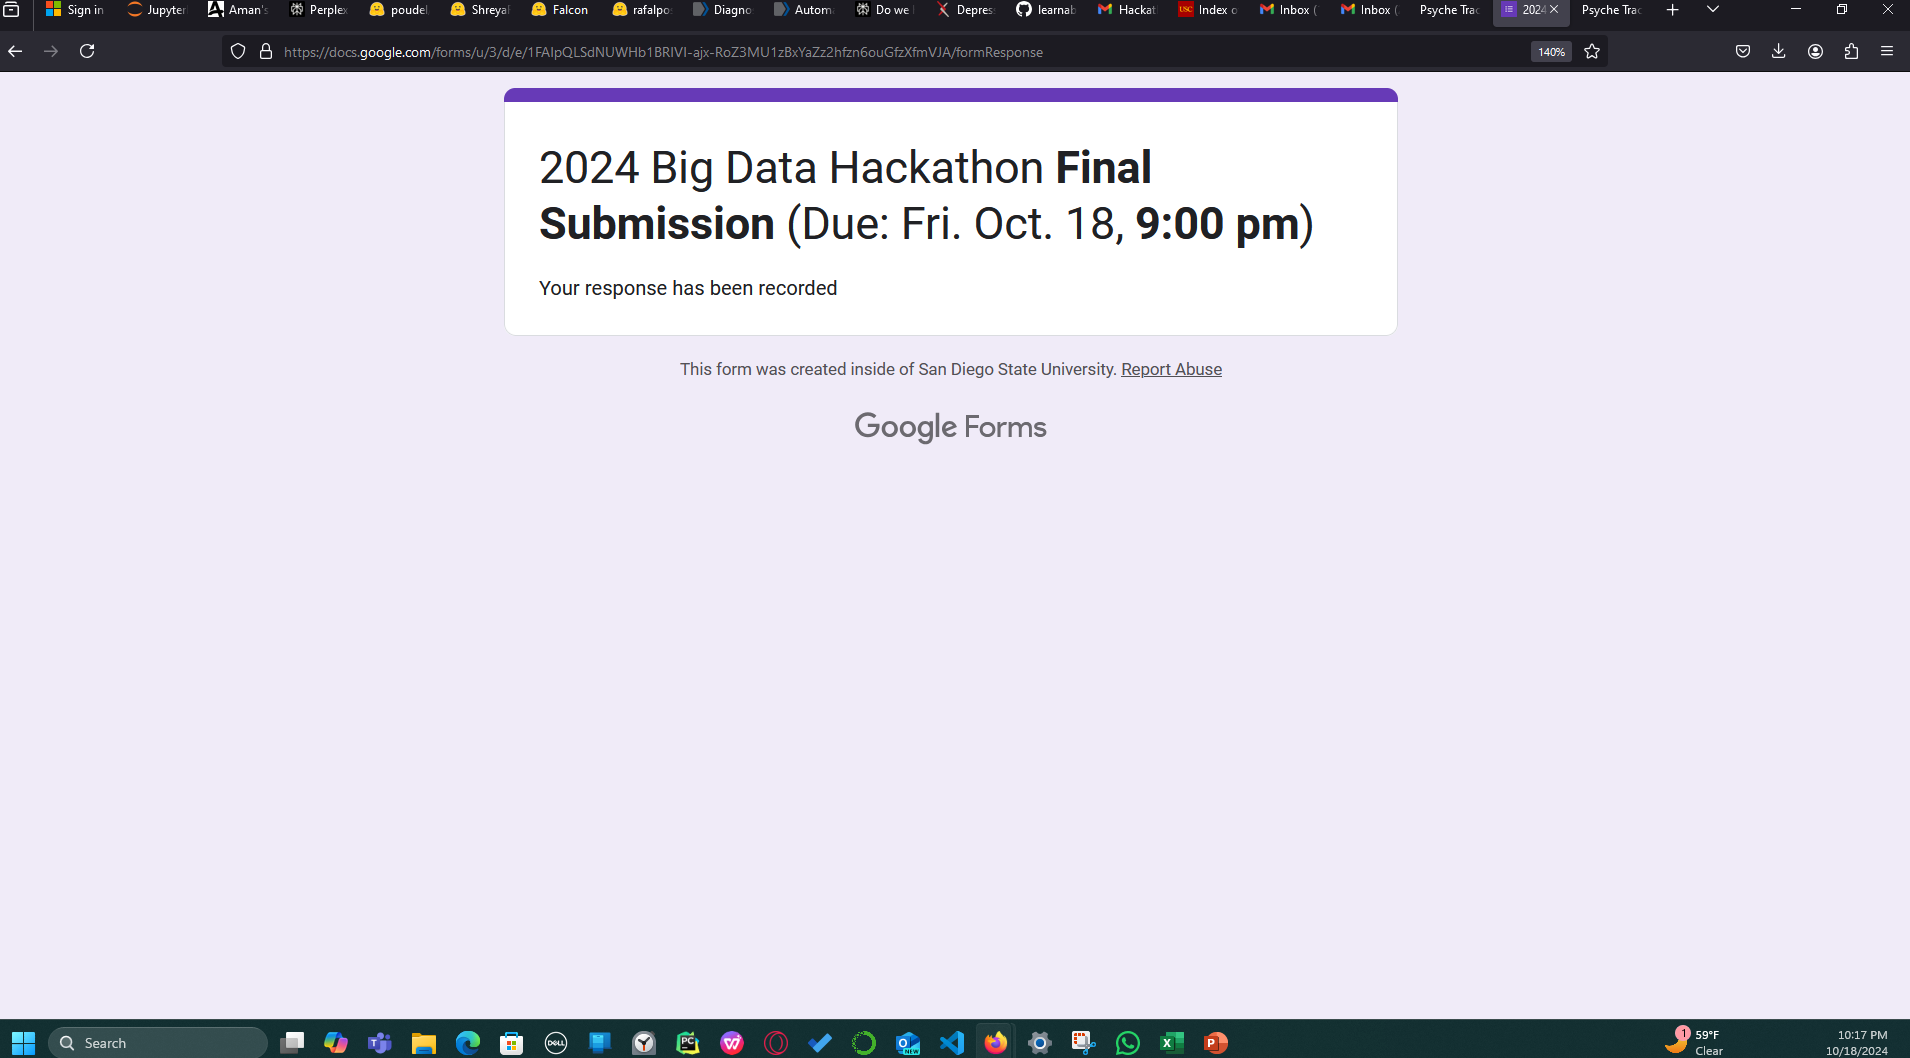

In [181]:
def ensemble_predict(text_input, audio_input_tensor):
    # Get predictions (logits) from both models
    _, text_logits = process_text(text_input)
    _, audio_logits = process_audio(audio_input_tensor)
    
    # Ensure both logits are on the same device
    text_logits = text_logits.to(device)  # Move text logits to the same device as the audio logits
    audio_logits = audio_logits.to(device)  # Ensure audio logits are on the same device (device = GPU or CPU)
    
    # Simple averaging of logits
    ensemble_logits = (text_logits + audio_logits) / 2
    
    # Get final predicted class
    final_prediction = torch.argmax(ensemble_logits, dim=1)
    return final_prediction


In [184]:
# def ensemble_predict_weighted(text_input, audio_input_tensor, text_weight=0.6, audio_weight=0.4):
#     # Get predictions from both models
#     text_logits = predict_text(text_input)
#     audio_logits = predict_audio(audio_input_tensor)
    
#     # Weighted combination of logits
#     ensemble_logits = (text_logits * text_weight) + (audio_logits * audio_weight)
    
#     # Get final predicted class
#     final_prediction = torch.argmax(ensemble_logits, dim=1)
#     return final_prediction
a=ensemble_predict(a, audio_data)

In [165]:
import torch.nn as nn

class EnsembleModel(nn.Module):
    def __init__(self, input_size):
        super(EnsembleModel, self).__init__()
        self.fc = nn.Linear(input_size, 2)  # Assuming binary classification (depression/not depressed)

    def forward(self, text_logits, audio_logits):
        combined = torch.cat((text_logits, audio_logits), dim=1)  # Concatenate both predictions
        return self.fc(combined)


In [166]:
ensemble_model = EnsembleModel(input_size=4)  # 2 logits from RoBERTa + 2 logits from FullModel

# Training loop
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ensemble_model.parameters(), lr=1e-4)

for epoch in range(num_epochs):
    for text_logits, audio_logits, labels in train_loader:
        optimizer.zero_grad()
        
        # Forward pass
        outputs = ensemble_model(text_logits, audio_logits)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
def process_text_prob(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = roberta_model(**inputs)
    
    # Apply softmax to logits to get probabilities
    probabilities = F.softmax(outputs.logits, dim=1)  # Returns probabilities for each class

    return probabilities